In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
steering = pd.read_csv("/Users/david/Documents/masters/thesis/analysis/r/steering/frames/causality.csv")
avas = pd.read_csv("/Users/david/Documents/masters/thesis/analysis/r/avas/frames/causality.csv")
avas["tp"] = (0.1 * avas["tp"]).astype(int)

display(steering.head(5))
display(avas.head(5))

,E,tau,tp,num_neighbors,lib_column,target_column,lib_size,num_pred,rho,mae,rmse,direction
0,3,1,-25,4,Left.wheel.RPM,Steering.wheel.angle,975,975,0.515861,97.877408,140.663298,Left.wheel.RPM xmap Steering.wheel.angle
1,3,1,-25,4,Right.wheel.RPM,Steering.wheel.angle,975,975,0.515861,97.877408,140.663299,Right.wheel.RPM xmap Steering.wheel.angle
2,3,1,-25,4,Steering.wheel.angle,Left.wheel.RPM,975,975,0.517003,37.319275,53.780364,Steering.wheel.angle xmap Left.wheel.RPM
3,3,1,-25,4,Right.wheel.RPM,Left.wheel.RPM,975,975,0.518010,37.260200,53.740022,Right.wheel.RPM xmap Left.wheel.RPM
4,3,1,-25,4,Steering.wheel.angle,Right.wheel.RPM,975,975,0.517003,37.319275,53.780364,Steering.wheel.angle xmap Right.wheel.RPM


,E,tau,tp,num_neighbors,lib_column,target_column,lib_size,num_pred,rho,mae,rmse,direction
0,2,1,-25,3,Airspeed,Altitude,7311,7311,0.505899,1880.121163,2636.255069,Airspeed xmap Altitude
1,8,1,-25,9,Pitch,Altitude,7311,7311,0.508352,1771.644337,2511.965617,Pitch xmap Altitude
2,8,1,-25,9,Altitude,Airspeed,7311,7311,0.723603,39.991873,66.968514,Altitude xmap Airspeed
3,8,1,-25,9,Pitch,Airspeed,7311,7311,0.634562,52.050919,75.205024,Pitch xmap Airspeed
4,8,1,-25,9,Altitude,Pitch,7311,7311,0.553339,0.153167,0.232098,Altitude xmap Pitch


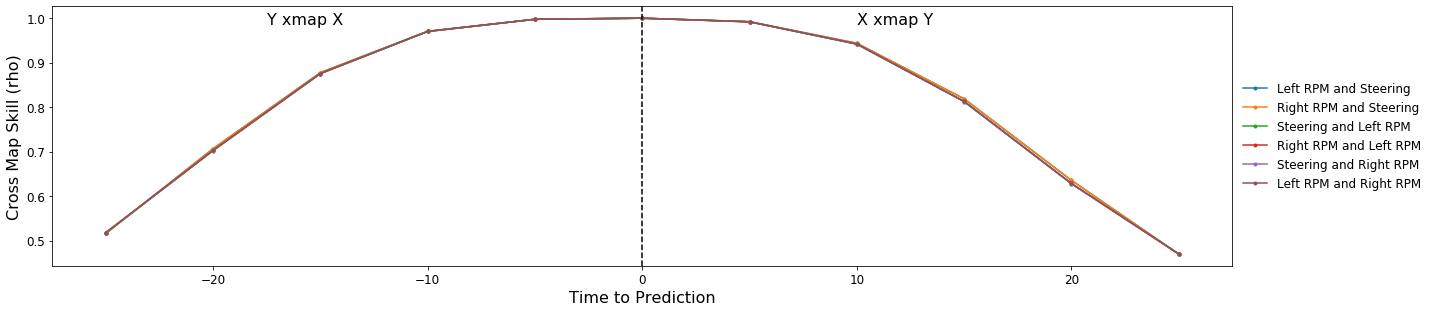

In [5]:
fig, ax = plt.subplots(figsize=(20,20/4.5))

# rename the directions
steering["direction"] = steering["direction"] \
    .str.replace("xmap", "and") \
    .str.replace("Left.wheel.RPM", "Left RPM") \
    .str.replace("Right.wheel.RPM", "Right RPM") \
    .str.replace("Steering.wheel.angle", "Steering")

# plot the lines
for d in steering["direction"].unique():
    temp = steering.loc[steering["direction"] == d]
    ax.plot(temp["tp"], temp["rho"], marker=".", label=d)

# pretty-fy
ax.set_xlabel("Time to Prediction", fontsize=16)
ax.set_ylabel("Cross Map Skill (rho)", fontsize=16)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.axvline(linestyle="--", color="k")
plt.legend(prop={"size": 12}, loc="center left", bbox_to_anchor=(1, 0.5), frameon=False)

# subtitles
text_width = 7.5
y_loc = 0.02 * (ax.get_ylim()[1] - ax.get_ylim()[0]) + 0.95 * ax.get_ylim()[1]
x1_loc = 0.5 * (ax.get_xlim()[1] - text_width)
x2_loc = 0.5 * (-ax.get_xlim()[1] - text_width)
plt.text(x1_loc, y_loc, "X xmap Y", fontsize=16)
plt.text(x2_loc, y_loc, "Y xmap X", fontsize=16)

# save and show
fig.tight_layout()
fig.savefig("/Users/david/Documents/masters/thesis/images/SteeringSystemEDMCausalityPredictions.png", dpi=200)

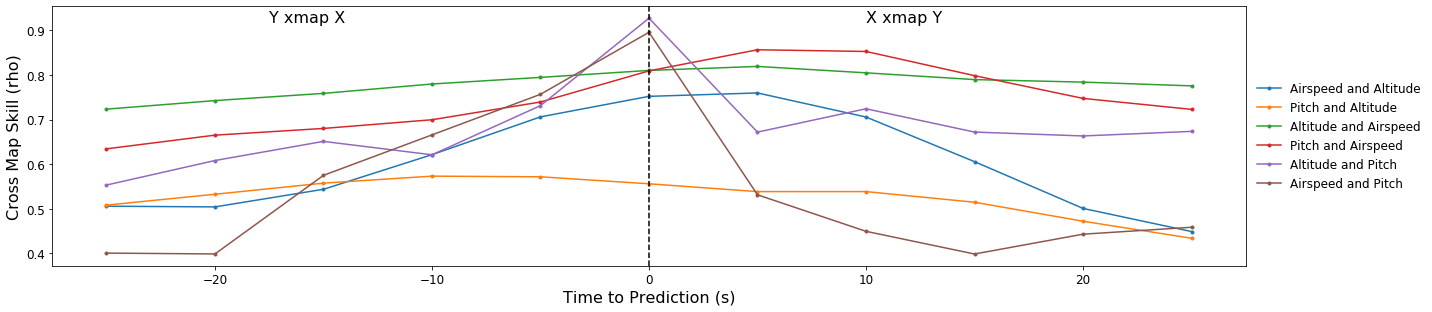

In [9]:
fig, ax = plt.subplots(figsize=(20,20/4.5))

# rename the directions
avas["direction"] = avas["direction"].str.replace("xmap", "and") \

# plot the lines
for d in avas["direction"].unique():
    temp = avas.loc[avas["direction"] == d]
    ax.plot(temp["tp"], temp["rho"], marker=".", label=d)

# pretty-fy
ax.set_xlabel("Time to Prediction (s)", fontsize=16)
ax.set_ylabel("Cross Map Skill (rho)", fontsize=16)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.axvline(linestyle="--", color="k")
plt.legend(prop={"size": 12}, loc="center left", bbox_to_anchor=(1, 0.5), frameon=False)

# subtitles
text_width = 7.5
y_loc = 0.02 * (ax.get_ylim()[1] - ax.get_ylim()[0]) + 0.95 * ax.get_ylim()[1]
x1_loc = 0.5 * (ax.get_xlim()[1] - text_width)
x2_loc = 0.5 * (-ax.get_xlim()[1] - text_width)
plt.text(x1_loc, y_loc, "X xmap Y", fontsize=16)
plt.text(x2_loc, y_loc, "Y xmap X", fontsize=16)

# save and show
fig.tight_layout()
fig.savefig("/Users/david/Documents/masters/thesis/images/AVASEDMCausalityPredictions.png", dpi=200)